<a href="https://colab.research.google.com/github/dwivedi717/Heart-disease-prediction/blob/main/Typeface_MNIST_Ashutosh_Dwivedi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Type Classification | TMNIST**

## **Abstract**

The objective of this notebook is to conduct digit recognition on the MNIST dataset, which comprises 10 digits. I have constructed a Convolutional Neural Network (CNN) using the Keras library with a TensorFlow backend to achieve this task. The results indicate an accuracy level of approximately 98.67%.


**About Dataset**

TMNIST: A database of Typeface based digits
This dataset is inspired by the MNIST database for handwritten digits. It consists of images representing digits from 0-9 produced using 2,990 google fonts files.

**The dataset consists of a single file: TMNIST_Data.csv**

This file consists of 29,900 examples with labels and font names. Each row contains 786 elements:
- The first element represents the font name (ex-Chivo-Italic, Sen-Bold)
- The second element represents the label (a number from 0-9)
- The remaining 784 elements represent the grayscale pixel values (from 0-255) for the 28x28 pixel image.

## **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as ts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

## **Reading Data**

In [3]:
# Readind data from csv
digit_df = pd.read_csv("https://raw.githubusercontent.com/dwivedi717/Heart-disease-prediction/main/DigitRecognition_Using_CNN_TMINST%20_Dataset")

**Dataset summary:**

- The names column can be dropped since it is font-style and irrelevant in the scenario.
- The labels column is the actual digit column,  which will be our target variable.
- Column 1 to 784 is 28 x 28 image pixels.

## **Data Preprocessing**

In [4]:
X = digit_df.drop(columns=['names','labels']).values #Dropping names and labels column for Input data

y = digit_df[['labels']].values # Setting label as target

In [5]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Normalisation**

- The pixel values of the images in the MNIST dataset are scaled by dividing them by 255.
- This operation ensures that the pixel values, originally ranging from 0 to 255 (representing grayscale intensities), are transformed to the range [0, 1].
- This normalization step is a common preprocessing practice before feeding the data into a neural network, and it contributes to the overall stability and effectiveness of the training process.

In [6]:
# Scaling
X_train = X_train/255
X_test = X_test/255

### **Reshaping**

- The images in the MNIST dataset are reshaped from their original 2D format (28x28 pixels) to a 3D format (28x28x1).
- The -1 in the reshape function is used to automatically infer the number of samples, preserving the original number of samples in the dataset.
- The resulting shape is (number of samples, height, width, channels), making it suitable for feeding into a CNN where the first convolutional layer expects input with these dimensions.

In [7]:
# Reshape images
X_train = X_train.reshape(-1, 28, 28, 1) # Reshapes the training images to a 4D tensor, where each image has dimensions 28x28x1
X_test = X_test.reshape(-1, 28, 28, 1) # Reshapes the test images in the same way as the training images

### **One-Hot Encoding**

- In classification tasks, the target labels represent different classes or categories. In the case of digit recognition (as in the MNIST dataset), each label corresponds to a digit (0 through 9).
- One-hot encoding transforms these categorical labels into a binary matrix, where each class is represented as a binary vector. This representation is suitable for training neural networks.

In [8]:
# Use OneHotEncoder to encode target column
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### **Plotting from Train and Test data**

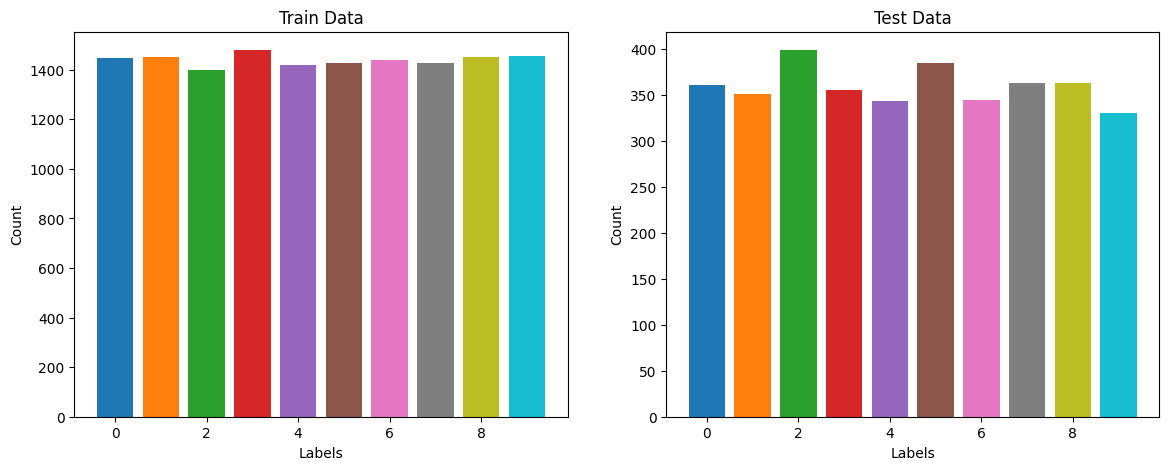

In [9]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(14, 5))

# Creating a distribution of count of digits in train data
for col in range(10):
    ax0.bar(col, y_train[:, col].sum(), label=f'Category {col+1}')
ax0.set_title('Train Data')
ax0.set_xlabel('Labels')
ax0.set_ylabel('Count')

# Creating a distribution of count of digits in test data
for col in range(10):
    ax1.bar(col, y_test[:, col].sum(), label=f'Category {col+1}')
ax1.set_title('Test Data')
ax1.set_xlabel('Labels')
ax1.set_ylabel('Count')

plt.show()

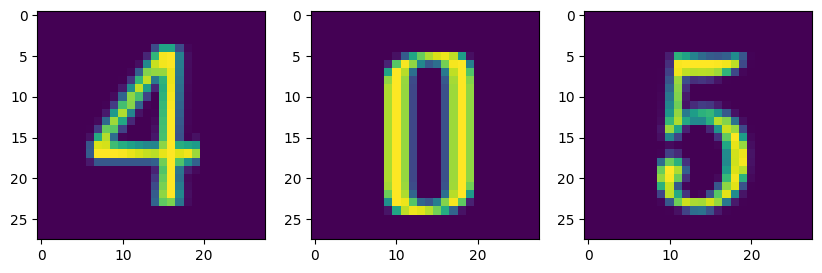

In [10]:
# Plotting first 3 image from train data
fig, ax = plt.subplots(1,3,figsize=(10,6))

ax[0].imshow(X_train[0])
ax[1].imshow(X_train[1])
ax[2].imshow(X_train[2])

## **Implementing CNN**

In [11]:
# CNN Model with layers
cnnModel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Convolutional layer with 32 output

    MaxPooling2D((2,2)), # Max pooling layer to reduce the spatial dimensions

    Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer with 64 output channels

    MaxPooling2D((2,2)),  # Max pooling layer to reduce the spatial dimensions

    Flatten(), # Flatten the output for input to fully connected layers

    Dense(256, activation='relu'),  # Another fully connected layer with 512 output units

    Dropout(0.5), # Dropout layer to prevent overfitting

    Dense(10, activation='softmax')  # Final fully connected layer with 10 output units (corresponding to classes)

])

1. **Conv2D Layer (32 filters):**
  - 32 filters (or kernels) with a size of (3, 3).
  - Activation function: ReLU (Rectified Linear Unit).
  - Input shape: (28, 28, 1), indicating the input image size of 28x28 pixels with a single channel (grayscale).

2. **MaxPooling2D Layer:**
  - Pooling layer with a pool size of (2, 2). <br>
  - This reduces the spatial dimensions of the output from the previous layer.

3. **Conv2D Layer (32 filters):**
  - Another convolutional layer with 32 filters and a size of (3, 3).
  - Activation function: ReLU.

4. **MaxPooling2D Layer:**
  - Another pooling layer with a pool size of (2, 2).

5. **Flatten Layer:**
  - Flattens the 2D output to a 1D array, preparing it for input to the fully connected layers.

6. **Dense Layer (Fully Connected) with 256 units:**
  - Activation function: ReLU.

7. **Dropout Layer:**
  - Dropout layer with a dropout rate of 0.5. Dropout is used to prevent overfitting by randomly dropping out units during training.

8. **Dense Layer (Fully Connected) with 10 units:**
  - Final output layer with 10 units, corresponding to the number of classes in the classification task (e.g., digits 0 through 9 for MNIST).
  - Activation function: Softmax, used for multi-class classification.

This architecture follows a common pattern for image classification tasks, with convolutional layers for feature extraction and fully connected layers for classification. The MaxPooling layers help reduce the spatial dimensions and control the number of parameters. The Dropout layer helps prevent overfitting during training.

### **Compiling**

This step is crucial in preparing the model for training.

The compile method requires several arguments that define how the model will be trained and evaluated.

In [12]:
# specifying optimizer, loss function, and metrics
cnnModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

**Explanation**

1. **Model Architecture:**<br>
  The model is a Sequential model, meaning that layers are added one after the other in a sequential manner.

2. **Layer Information:**<br>
  The table provides information about each layer in the model, including the type of layer, the output shape, and the number of parameters.

3. **Layer Types:**<br>
  - Conv2D: Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation.
  - MaxPooling2D: Max pooling layer with a pool size of (2, 2).
  - Flatten: Flattening layer to convert the 2D output to a 1D array.
  - Dense: Fully connected layer with 256 units and ReLU activation, followed by a dropout layer with a dropout rate of 0.5.
  - Another Dense layer with 10 units and softmax activation, representing the output layer for 10 classes (digits 0 through 9).

4. **Output Shape:**<br>
  The output shape for each layer is displayed, indicating the dimensions of the output tensor at that layer.

5. **Parameters:**<br>
  The number of parameters for each layer, representing the weights and biases that the model will learn during training. These parameters are crucial for the model to make accurate predictions.

6. **Total Trainable Parameters:**<br>
  The total number of trainable parameters in the model, which is the sum of parameters across all layers. This value is important for understanding the model's capacity and the amount of memory it requires.

7. **Trainable and Non-trainable Parameters:**<br>
  Trainable parameters are those that will be updated during training to minimize the loss function. Non-trainable parameters, often associated with certain layers (like pooling layers), remain fixed during training.

### **Training the model**

In [14]:
modelHistory = cnnModel.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.2)

Epoch 1/5
720/720 [==============================] - 13s 17ms/step - loss: 0.2739 - accuracy: 0.9153 - val_loss: nan - val_accuracy: 0.9778
Epoch 2/5
720/720 [==============================] - 12s 16ms/step - loss: 0.0772 - accuracy: 0.9777 - val_loss: nan - val_accuracy: 0.9819
Epoch 3/5
720/720 [==============================] - 12s 17ms/step - loss: 0.0562 - accuracy: 0.9835 - val_loss: nan - val_accuracy: 0.9858
Epoch 4/5
720/720 [==============================] - 12s 17ms/step - loss: 0.0409 - accuracy: 0.9888 - val_loss: nan - val_accuracy: 0.9875
Epoch 5/5
720/720 [==============================] - 12s 17ms/step - loss: 0.0335 - accuracy: 0.9899 - val_loss: nan - val_accuracy: 0.9868


## **Plotting model performance**

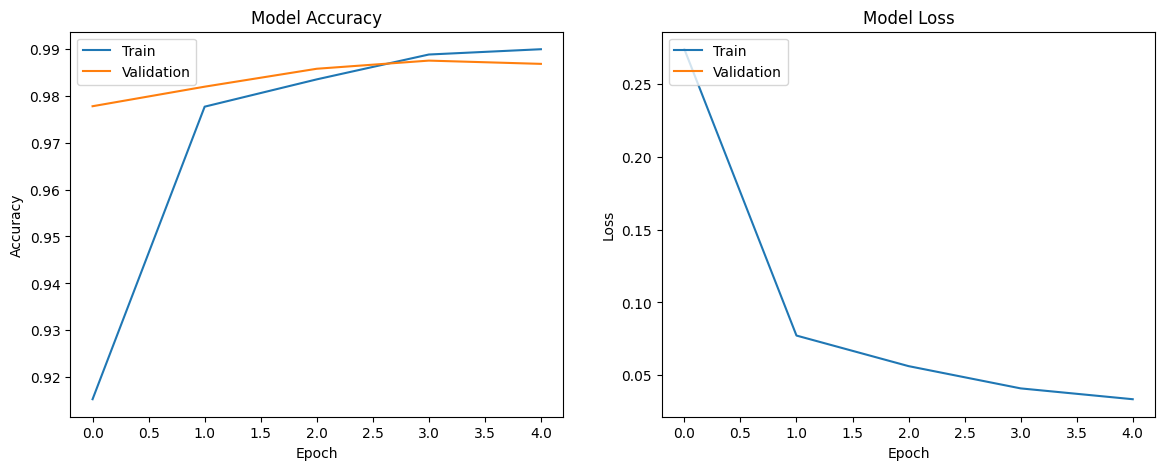

In [15]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(14, 5))

ax0.plot(modelHistory.history['accuracy'])
ax0.plot(modelHistory.history['val_accuracy'])
ax0.set_title('Model Accuracy')
ax0.set_xlabel('Epoch')
ax0.set_ylabel('Accuracy')
ax0.legend(['Train', 'Validation'], loc='upper left')

ax1.plot(modelHistory.history['loss'])
ax1.plot(modelHistory.history['val_loss'])
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## **Evaluating the model**

In [16]:
results = cnnModel.evaluate(X_test, y_test)

113/113 [==============================] - 1s 8ms/step - loss: 0.0434 - accuracy: 0.9867


In [17]:
print(f"Accuracy: {round(results[1],4)*100}%")
print(f"Loss: {round(results[0],4)*100}%")

Accuracy: 98.67%
Loss: 4.34%


## **Conclusion**

- Convolutional Neural Network (CNN) architecture was employed for digit recognition on the MNIST dataset.
- The model consisted of convolutional and pooling layers for feature extraction, followed by fully connected layers for classification.
- Training the model for 5 epochs yielded impressive results, achieving an accuracy of 98.67% on the validation set.
- The loss was minimized to 4.34%, showcasing the effectiveness of the CNN in accurately recognizing handwritten digits.

## **License**

MIT License

Copyright (c) [2024] [Ashutosh Vinod Dwivedi]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS," WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## **References**

Tensorflow- https://www.tensorflow.org/learn<br>
CNN - https://www.tensorflow.org/tutorials/images/cnn <br>
Kaggle Dataset- https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist<br>
Kaggle notebook - https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy<br>